# **TTI109 - Estatística**
# **Aula 02 - Estatística Descritiva 01**

Nessa aula vamos aprender a construir:

* Classes para descrever uma distribuição de dados;
* Tabelas de frequências;
* Histogramas;
* Polígonos de frequências.

## **Construindo uma distribuição de frequência com base em um conjunto de dados**

O conjunto de dados a seguir lista os preços (em dólares) de 30 aparelhos
GPS (global positioning system) portáteis.
Construa uma distribuição de frequência com sete classes.

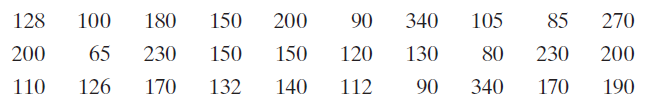

In [7]:
import pandas as pd
# Conjunto de dados
data = pd.Series([128, 100, 180, 150, 200, 90, 340, 105, 85, 270,
                  200, 65, 230, 150, 150, 120, 130, 80, 230, 200,
                  110, 126, 170, 132, 140, 112, 90, 340, 170, 190])
print(data)

ModuleNotFoundError: No module named 'pandas'

In [9]:
# Valores máximo, mínimo e número de classes
v_max = data.max()
v_min = data.min()
n_classes = 7
print(f'Valor mínimo da distribuição = {v_min}')
print(f'Valor máximo da distribuição = {v_max}')

Valor mínimo da distribuição = 65
Valor máximo da distribuição = 340


## **Distribuição de Frequências**

O método `value_counts` registra a frequência de ocorrência dos dados em cada classe (o número de classes é dado pelo parâmetro `bins`). O método `sort_index` ordena os índices (classes) em ordem crescente.

In [10]:
dist_freq = data.value_counts(bins=7).sort_index()
print(dist_freq)

(64.72399999999999, 104.286]    6
(104.286, 143.571]              9
(143.571, 182.857]              6
(182.857, 222.143]              4
(222.143, 261.429]              2
(261.429, 300.714]              1
(300.714, 340.0]                2
Name: count, dtype: int64


Note que as classes da distribuição de frequências não estão definidas de forma "amigável". Vamos alterar a definição dos intervalos de classe usando o método `interval_range`.

In [11]:
# Reconfiguração do conjunto de dados: Pandas Series para Pandas DataFrame
nova_dist_freq = pd.DataFrame(dist_freq)
display(nova_dist_freq)

,count
"(64.72399999999999, 104.286]",6
"(104.286, 143.571]",9
"(143.571, 182.857]",6
"(182.857, 222.143]",4
"(222.143, 261.429]",2
"(261.429, 300.714]",1
"(300.714, 340.0]",2


In [12]:
# Resetando os índices do DataFrame
nova_dist_freq = nova_dist_freq.reset_index()
display(nova_dist_freq)

,index,count
0,"(64.72399999999999, 104.286]",6
1,"(104.286, 143.571]",9
2,"(143.571, 182.857]",6
3,"(182.857, 222.143]",4
4,"(222.143, 261.429]",2
5,"(261.429, 300.714]",1
6,"(300.714, 340.0]",2


In [13]:
# Renomeando as colunas do DataFrame
nova_dist_freq = ['Classe', 'Frequencia']
display(nova_dist_freq)

['Classe', 'Frequencia']

In [1]:
# Cálculo da amplitude de classe, com respectivos intervalos de classe
amplitude = round(v_max-v_min)/n_classes
intervalos = pd.round(interval_range(start=v_min, end=v_max, freq=amplitude))
print(intervalos)

NameError: name 'v_max' is not defined

In [15]:
# Atribuição dos intervalos para a coluna Classe
nova_dist_freq['Classe'] = intervalos
display(nova_dist_freq)

TypeError: list indices must be integers or slices, not str

## **Caracterísiticas adicionais da distribuição**

Vamos adicionar as colunas que exibem os pontos médios, a frequência relativa e a frequência acumnulada de cada classe da distribuição.

In [ ]:
# Cálculo dos pontos médios das classe
pts_medios = [inter.mid for inter in intervalos]
print(pts_medios)

In [ ]:
# Inserção da coluna Pontos médios
nova_dist_freq['Pontos médios'] = pts_medios
display(nova_dist_freq)

In [ ]:
# Cálculo e inserção das colunas de frequência relativa e acumulada
observacoes = len(data)
nova_dist_freq['Frequencia relativa'] = nova_dist_freq['Frequencia']/observacoes
nova_dist_freq['Frequencia acumulada'] = nova_dist_freq['Frequencia'].cumsum()
display(nova_dist_freq)

## **Construção do histograma de frequências**

O histograma é construído usando o método `hist` do `Pandas`. Diversas características do histograma, tais como as classes (parâmetro `bins`), cor das barras e marcações nos eixos vertical e horizontal são programáveis.

In [ ]:
import matplotlib.pyplot as plt

# Construção do histograma
histograma = data.hist(bins={inter.left for inter in intervalos}+{v_max}, color='blues', edgecolor='black', grid=False)
# Inserção de atributos ao gráfico


Vamos agora inserir a frequência observada no topo de cada barra. Embora opcional, essa é uma representação que facilita a visualização das frequências relativas. Apenas para diferenciar da representação anterior, vamos usar a cor verde para as barras.

In [ ]:
# Construção do histograma
histograma = data.hist(bins=[inter.left for inter in intervalos]+[v_max],
                       color='green', edgecolor='black', grid=False)
# Inserção de atributos ao gráfico
histograma.set(xlabel='Preço [US$]',
               ylabel='Frequência - Número de navegadores GPS',
               title='Distribuição de frequências dos preços de GPS',
               xticks=nova_dist_freq['Pontos médios'],
               yticks=range(0,nova_dist_freq['Frequência'].max()+2,2))
# Inserção de rótulos nas barras do histograma
barras = histograma.patches
freqs = nova_dist_freq['Frequência']
for barra, freq in zip(barras, freqs):
    altura = barra.get_height()
    histograma.text(x=barra.get_x()+barra.get_width()/2, y=altura+0.1,
                    s=freq, ha='center', va='bottom')
plt.show()


## **Construção do polígono de frequências**

Para construir o polígono de frequências, vamos empregar comandos próprios da biblioteca `matplotlib.pyplot`.

In [ ]:
# Cálculo dos pontos médios fictícios
fic_esq =
print(f'Ponto médio fictício à esquerda = {fic_esq[0]}')
fic_dir =
print(f'Ponto médio fictício à direita = {fic_dir[0]}')

In [ ]:
# Construção dos dados com inserção dos pontos médios fictícios
x_data =
print(f'Valores para eixo x: {x_data}')
y_data =
print(f'Valores para eixo y: {y_data}')

In [ ]:
# Plotagem do polígono de frequências, com diversos atributos


In [ ]:
# Plotagem do polígono de frequências com frequências relativas

plt.xlabel('Preço [US$]')
plt.ylabel('Frequência relativa')
plt.title('Distribuição de frequências dos preços de GPS')
plt.xticks(x_data)
plt.grid()